In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import sweetviz

### Importando dados e analise do Dataset

In [2]:

dados=pd.read_csv("anemia.csv")
dados

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [3]:
dados.info()
dados.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


Gender        1421
Hemoglobin    1421
MCH           1421
MCHC          1421
MCV           1421
Result        1421
dtype: int64

### Analisando um panorama geral dos dados

In [4]:
visualizacao=sweetviz.analyze(dados)
visualizacao.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### calculando a matriz de correlação entre as variáveis

In [5]:
mask = np.triu(np.ones_like(dados.corr(), dtype=bool))

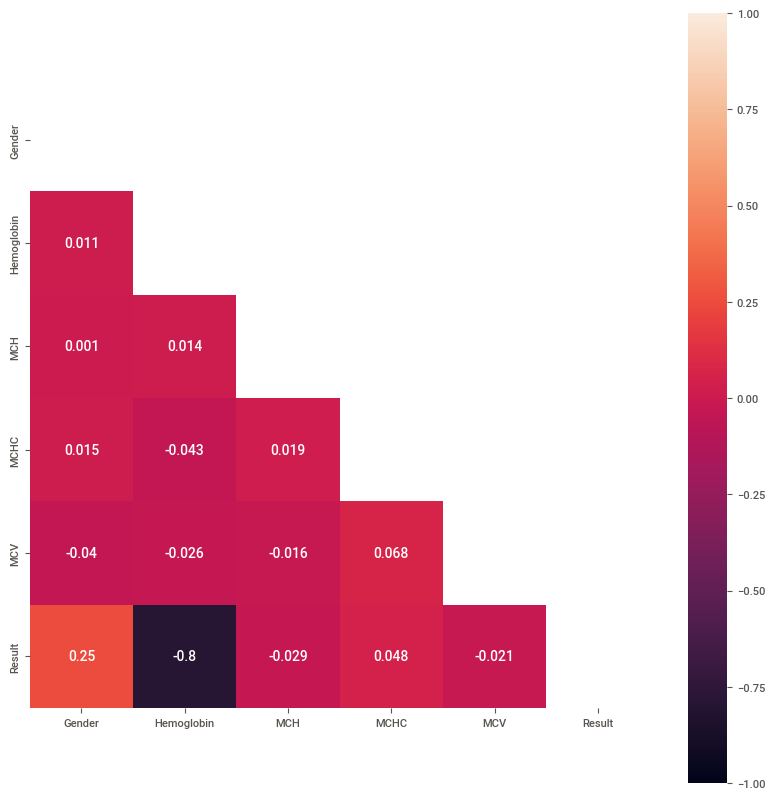

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(dados.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1)
plt.show()

##### "Result" possuem uma correlação negativamente com a variável "Hemoglobin", isso pode significar que pacientes com níveis mais baixos de hemoglobina têm uma maior probabilidade de serem diagnosticados como anêmicos. Junto a isso também podemos verificar que existe um leve relação entre genêro e resultados, mas isso pode ser uma falsa relação visto que no dataset possuem mais mulheres do que homens.

### Analisando anemia por gênero

In [7]:
anemia_por_genero = dados.groupby(['Gender', 'Result']).size().unstack()
print(anemia_por_genero)

print('------------------------------------------')

total_por_genero = dados.groupby('Gender').size()
anemia_por_genero_percento = (anemia_por_genero.T / total_por_genero * 100).T
print(anemia_por_genero_percento)


Result    0    1
Gender          
0       473  208
1       328  412
------------------------------------------
Result          0          1
Gender                      
0       69.456681  30.543319
1       44.324324  55.675676


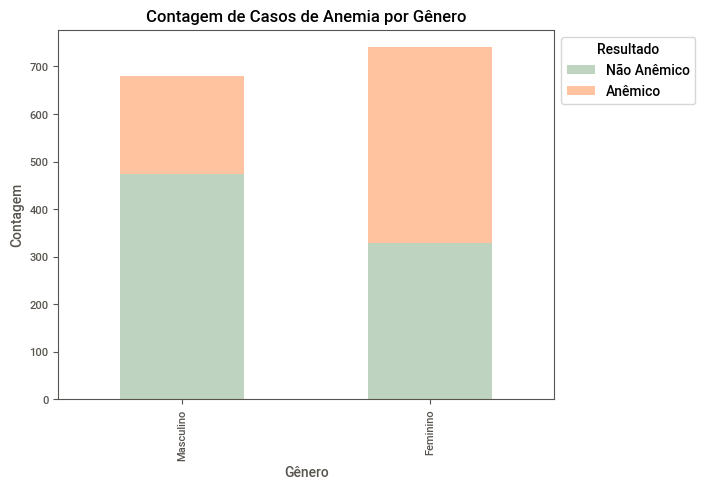

In [8]:

colors = ["#BFD3C1", "#FFC3A0"]
anemia_por_genero.plot(kind='bar', stacked=True, color=colors)
plt.title('Contagem de Casos de Anemia por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'])
plt.legend(title='Resultado', labels=['Não Anêmico', 'Anêmico'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


##### Nessa análise podemos verificar que as pessoas do sexo feminino apresentaram uma maior taxa de pessoas com anemia. Mas isso não desmontra que o gênero feminino possui uma maior probabilidade de desenvolver essa doença.

### Realizando uma comparação entre níveis de hemoglobina de uma pessoa Não anêmica e uma pessoa Anêmica

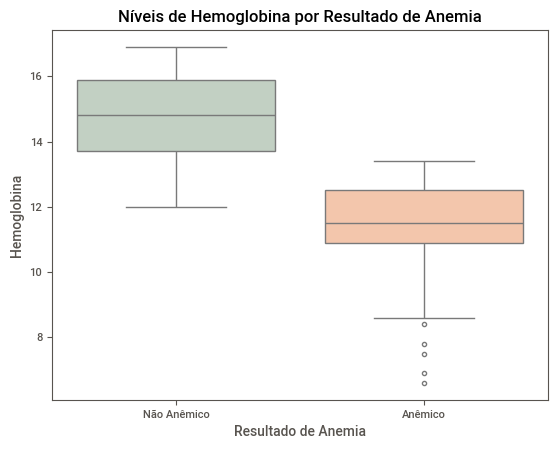

In [17]:
colors = ["#BFD3C1", "#FFC3A0"]
sns.boxplot(x='Result', y='Hemoglobin', data=dados, hue='Result', palette=colors, legend=False)
plt.title('Níveis de Hemoglobina por Resultado de Anemia')
plt.xlabel('Resultado de Anemia')
plt.ylabel('Hemoglobina')
plt.xticks(ticks=[0, 1], labels=['Não Anêmico', 'Anêmico'])
plt.show()


##### O gráfico de boxplot permite visualizar a distribuição, a mediana e a dispersão dos valores de hemoglobina para cada grupo de pacientes (anêmicos e não anêmicos), facilitando a comparação entre os dois grupos. Em segui realizarei a comparação entre os outros atributos 

### Analisando as hemácias em termos de quantidade de hemoglobina

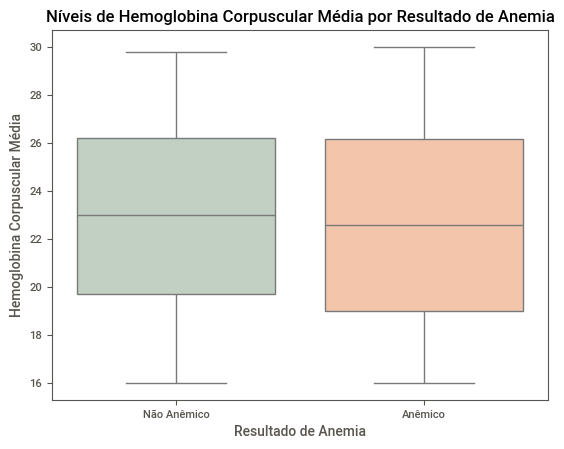

In [19]:
colors = ["#BFD3C1", "#FFC3A0"]
sns.boxplot(x='Result', y='MCH', data=dados, hue='Result', palette=colors, legend=False)
plt.title('Níveis de Hemoglobina Corpuscular Média por Resultado de Anemia')
plt.xlabel('Resultado de Anemia')
plt.ylabel('Hemoglobina Corpuscular Média')
plt.xticks(ticks=[0, 1], labels=['Não Anêmico', 'Anêmico'])
plt.show()


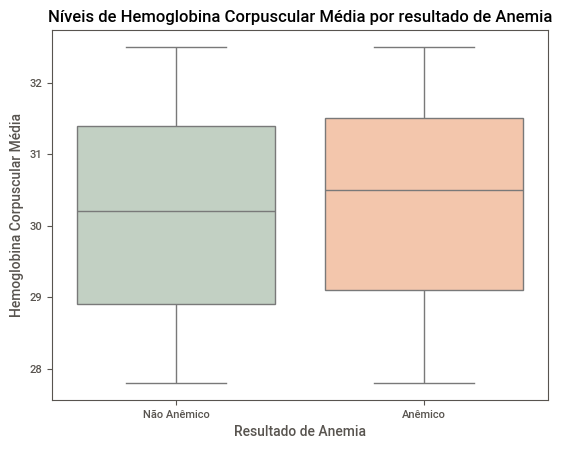

In [18]:
colors = ["#BFD3C1", "#FFC3A0"]
sns.boxplot(x='Result', y='MCHC', data=dados, hue='Result', palette=colors, legend=False)
plt.title('Níveis de Hemoglobina Corpuscular Média por resultado de Anemia')
plt.xlabel('Resultado de Anemia')
plt.ylabel('Hemoglobina Corpuscular Média')
plt.xticks(ticks=[0, 1], labels=['Não Anêmico', 'Anêmico'])
plt.show()

### Construindo uma Modelagem Preditiva

In [12]:
X = dados.drop('Result', axis=1)  # Features
y = dados['Result']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       128

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285


Matriz de Confusão:
 [[157   0]
 [  0 128]]


##### Com uma acurácia de 100% o relatório de classificação apresentou um ótimo desempenho após a utilização dodos de teste, ou seja, ele foi possível de identificar corretamente todos os pacientes que são ou não anêmicos

### Avaliando Modelo

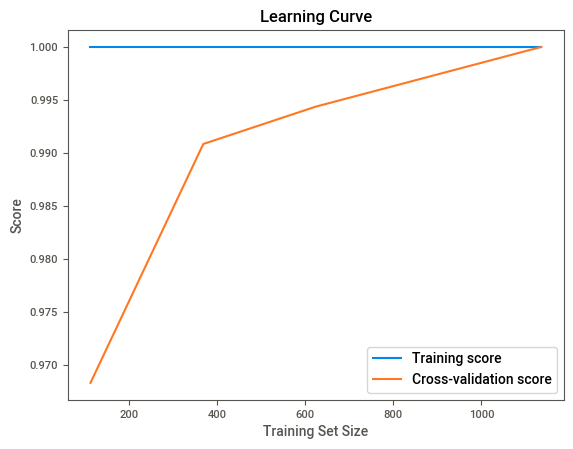

In [15]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

##### O gráfico mostra como o desempenho do modelo melhora à medida que mais dados são usados para treinamento.

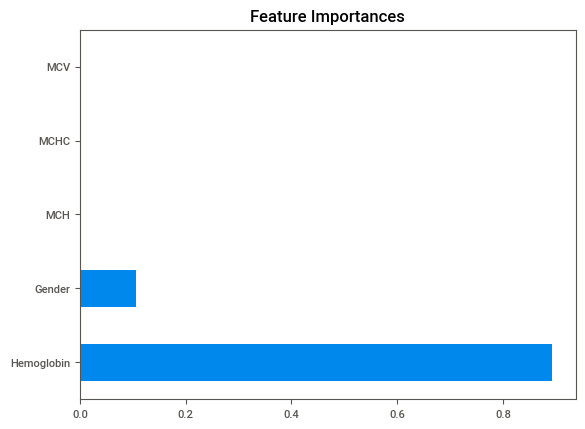

In [16]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

##### Como podemos ver a hemoglobina é a característica mais relevante a ser considerada, já o gênero possui uma baixa importância relativa. As outras características têm menos impacto nesse modelo.